# Extract RB number from randomized experiments

Load the experiment `.gst` files and find experiments equivalent to the `Id` operation

In [6]:
using Glob, Cliffords, PyPlot

INFO: Precompiling module PyPlot.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] uuid4(::MersenneTwister) at ./deprecated.jl:57
 [3] msg_header at /home/jovyan/.julia/v0.6/IJulia/src/msg.jl:18 [inlined]
 [4] msg_pub(::IJulia.Msg, ::String, ::Dict{String,String}, ::Dict{String,Any}) at /home/jovyan/.julia/v0.6/IJulia/src/msg.jl:30 (repeats 2 times)
 [5] send_stream(::String) at /home/jovyan/.julia/v0.6/IJulia/src/stdio.jl:172
 [6] send_stdio(::String) at /home/jovyan/.julia/v0.6/IJulia/src/stdio.jl:130
 [7] (::Base.##302#303{IJulia.#send_stderr,Timer})() at ./event.jl:436
while loading In[6], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] @dep_vectorize_1arg(::ANY, ::ANY) at /home/jovyan/.julia/v0.6/Compat/src/deprecated.jl:18
 [3] include_from_node1(::String) at ./loading.jl:576
 [4] include(::String) at ./sysimg.jl:14
 [5] include_from_node1(::String) at ./loading.jl:576
 [6] include(::String) at ./sysi

In [2]:
# grab useful functions for multiplying Cliffords, parsing GST seqs and fitting
include("../scripts/RB.jl")

INFO: Precompiling module Calculus.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] uuid4(::MersenneTwister) at ./deprecated.jl:57
 [3] msg_header at /home/jovyan/.julia/v0.6/IJulia/src/msg.jl:18 [inlined]
 [4] msg_pub(::IJulia.Msg, ::String, ::Dict{String,String}, ::Dict{String,Any}) at /home/jovyan/.julia/v0.6/IJulia/src/msg.jl:30 (repeats 2 times)
 [5] send_stream(::String) at /home/jovyan/.julia/v0.6/IJulia/src/stdio.jl:172
 [6] send_stdio(::String) at /home/jovyan/.julia/v0.6/IJulia/src/stdio.jl:130
 [7] (::Base.##302#303{IJulia.#send_stderr,Timer})() at ./event.jl:436
while loading /home/jovyan/.julia/v0.6/LsqFit/src/LsqFit.jl, in expression starting on line 7
INFO: Precompiling module Distributions.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] uuid4(::MersenneTwister) at ./deprecated.jl:57
 [3] msg_header at /home/jovyan/.julia/v0.6/IJulia/src/msg.jl:18 [inlined]
 [4] msg_pub(::IJulia.Msg, ::String, ::Dict{String,String}, ::Dict

fit_RB

In [4]:
run(`head ../data/rgst_1.gst`)

## Columns = minus count, plus count
{} 845 155
Gx 471 529
Gy 500 500
GxGx 154 846
GxGxGx 502 498
GyGyGy 513 487
GxGy 484 516
GxGxGxGx 828 172
GxGyGyGy 480 520


In [5]:
files = Glob.glob("../data/rgst_[1-7].gst")

7-element Array{String,1}:
 "../data/rgst_1.gst"
 "../data/rgst_2.gst"
 "../data/rgst_3.gst"
 "../data/rgst_4.gst"
 "../data/rgst_5.gst"
 "../data/rgst_6.gst"
 "../data/rgst_7.gst"

estimated infidelity for file ../data/rgst_1.gst: 0.00749467943882317
estimated infidelity for file ../data/rgst_2.gst: 0.008002726857431797


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] uuid4(::MersenneTwister) at ./deprecated.jl:57
 [3] msg_header at /home/jovyan/.julia/v0.6/IJulia/src/msg.jl:18 [inlined]
 [4] msg_pub(::IJulia.Msg, ::String, ::Dict{String,String}, ::Dict{String,Any}) at /home/jovyan/.julia/v0.6/IJulia/src/msg.jl:30 (repeats 2 times)
 [5] send_stream(::String) at /home/jovyan/.julia/v0.6/IJulia/src/stdio.jl:172
 [6] send_stdio(::String) at /home/jovyan/.julia/v0.6/IJulia/src/stdio.jl:130
 [7] (::Base.##302#303{IJulia.#send_stdout,Timer})() at ./event.jl:436
while loading In[12], in expression starting on line 2


estimated infidelity for file ../data/rgst_3.gst: 0.0074202033313974574
estimated infidelity for file ../data/rgst_4.gst: 0.007289581987542186
estimated infidelity for file ../data/rgst_5.gst: 0.007611355632031091
estimated infidelity for file ../data/rgst_6.gst: 0.0076782099967172635


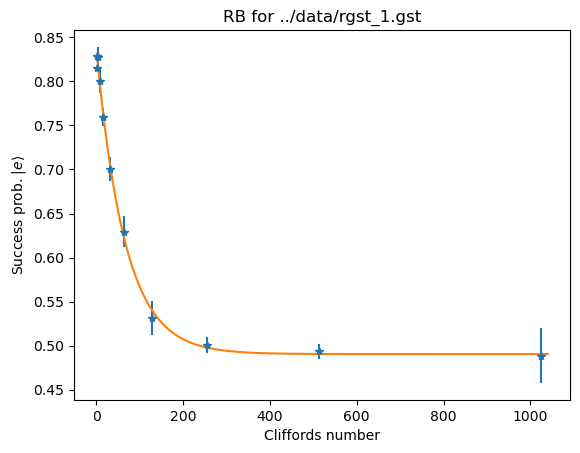

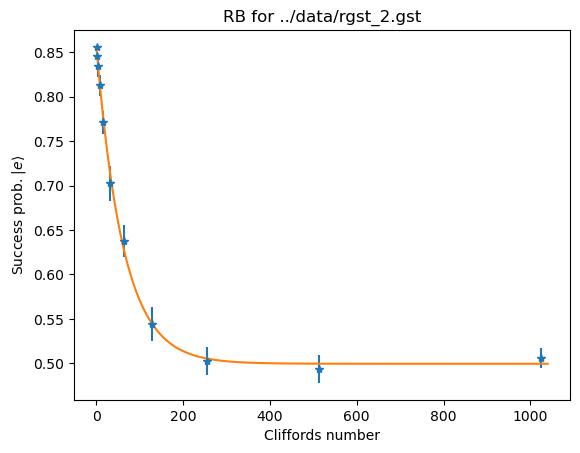

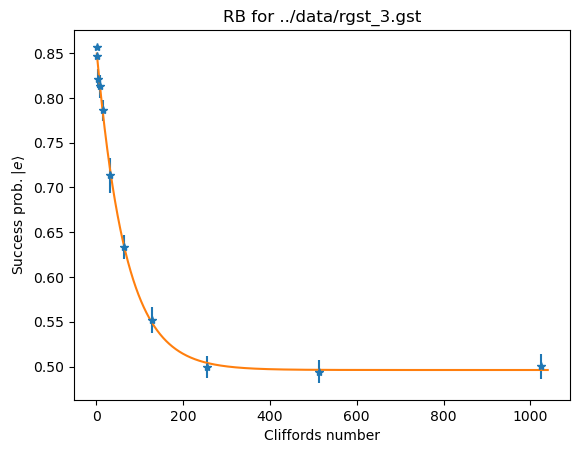

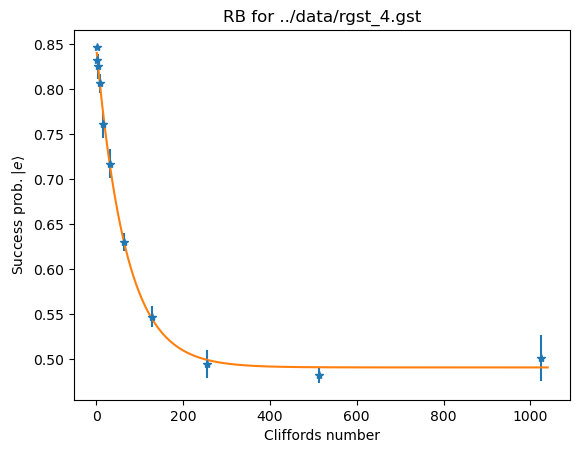

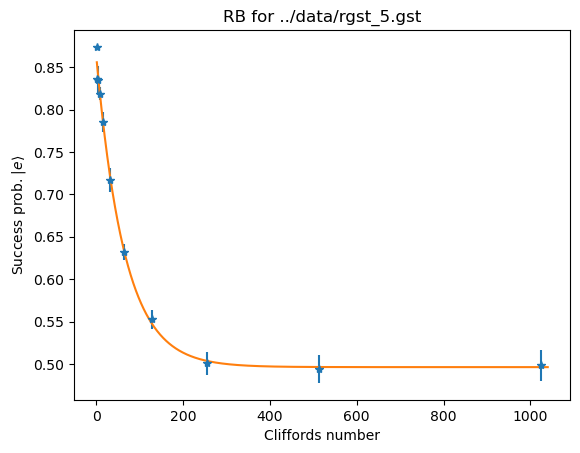

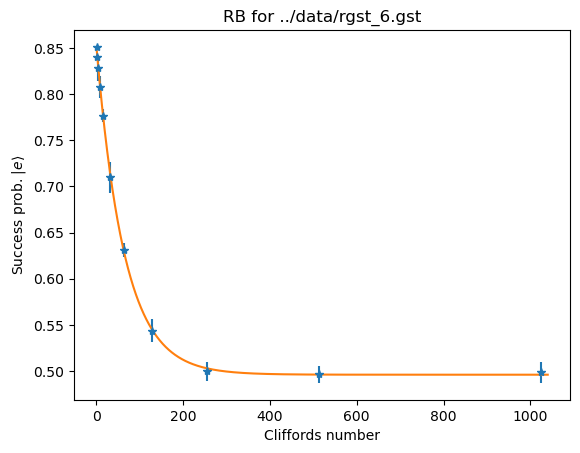

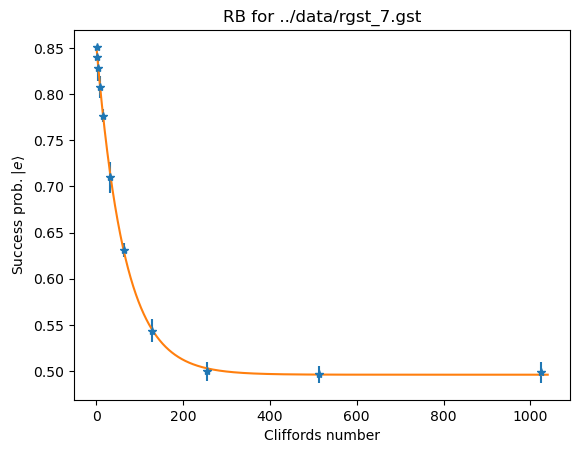

estimated infidelity for file ../data/rgst_7.gst: 0.0076782099967172635


In [12]:
infidelities = []
for f in files
    # pull out the circuit strings from the .gst files
    circuits = readlines(f)[2:end] .|> s -> split(s, " ")[1];
    # convert to numbers
    gsts = []
    for c in circuits
        # note the number match our mapping to each gate's enumeration 
        # in our set of Cliffords
        number_list = parse_gst(c, Dict("x"=>2,"y"=>5,"i"=>1,"{}"=>0))
        push!(gsts, number_list)
    end
    
    # pull out the Id and Z indices
    ind = []
    lengths = []
    # now on to experiments with non-zero length (that is why we start at index 2)

    # loop through all experiments
    for n in 2:length(gsts)
        # accumulate sequences
        inter = 1 # identity index
        for i in 1:length(gsts[n])
            inter   = multiply(gsts[n][i],inter)
        end
        if inter == 1 || inter == 9
            push!(ind, n)
            push!(lengths, length(gsts[n]))
        end
    end
    
    # get the +/- counts
    minus_ct = readlines(f)[2:end] .|> s -> parse(Int, split(s, " ")[2]);
    plus_ct = readlines(f)[2:end] .|> s -> parse(Int, split(s, " ")[3]);
    
    # convert to Z-axes projection
    mc = minus_ct[ind];
    pol = [mc[i] / 1000 for i in 1:length(mc)];
    
    # collect data and organize
    data = sortrows(reshape([lengths; pol], length(lengths), 2));
    p2_data = data[ispow2.(data[:,1]),:];
    ddict = Dict{Int,Array{Float64}}()
    for i = 1:size(p2_data,1)
       v, y = p2_data[i,1], p2_data[i,2]
       if haskey(ddict, v)
           push!(ddict[v], y)
       else
           ddict[v] = [y]
       end
    end
    ddict = sort(ddict)
    
    # fit data
    fit = fit_RB(collect(keys(ddict)), map(mean, collect(values(ddict))))
    # estimated infidelity
    println("estimated infidelity for file $f: ", fit.fit_params["b"] / 2)
    push!(infidelities, fit.fit_params["b"] / 2)
    
    # plot
    figure()
    errorbar(collect(keys(ddict)), map(mean, collect(values(ddict))), yerr=map(std, collect(values(ddict))), linestyle="", marker="*")
    plot(1:1040, fit.fit_curve(1:1040))
    title("RB for $f")
    xlabel("Cliffords number")
    ylabel(L"Success prob. $|e\rangle$")
end

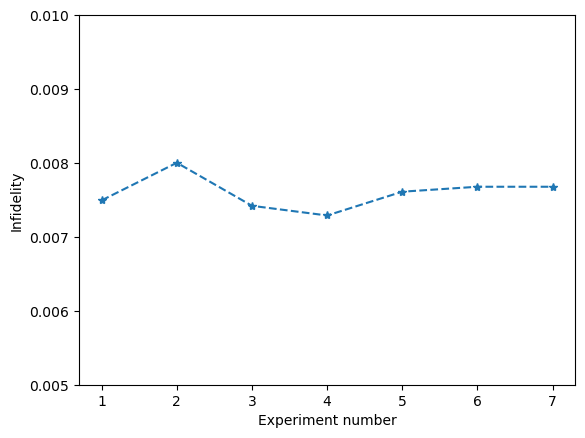

(0.005, 0.01)

In [18]:
plot(1:7, infidelities, linestyle="--", marker="*")
xlabel("Experiment number")
ylabel("RB Infidelity")
ylim(0.005, 0.01)